C:\Users\prian\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


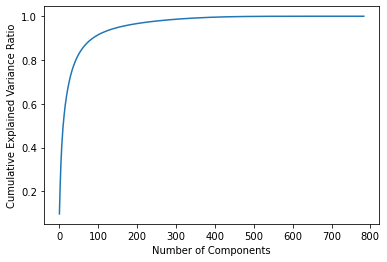

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape((X_train.shape[0], -1))



X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

cov_matrix = np.cov(X_centered.T)


eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
  
# Sort eigenvalues and eigenvectors in descending order
idx = eig_vals.argsort()[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:, idx]



explained_variance_ratio = eig_vals / np.sum(eig_vals)

# Plot explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


C:\Users\prian\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


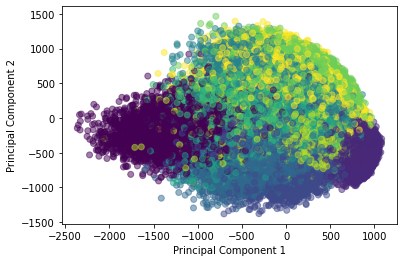

In [6]:
X_pca = np.dot(X_centered, top_k_eig_vecs)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

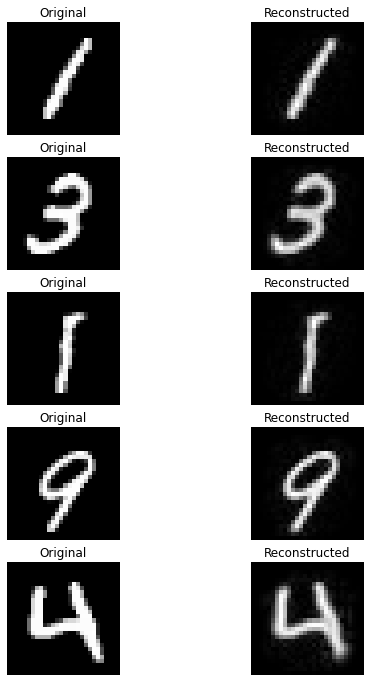

In [5]:
#k=154 gives the nearest recontructed image therefoe we selected it as these eigen vec represent maximum varience
k = 154
top_k_eig_vecs = eig_vecs[:, :k]

# Encode data
X_pca = np.dot(X_centered, top_k_eig_vecs)

# Reconstruct images
X_reconstructed = np.dot(X_pca, top_k_eig_vecs.T) + X_mean


n_images = 5
fig, ax = plt.subplots(n_images, 2, figsize=(8, 12))
for i in range(n_images):
    
    idx = np.random.randint(X.shape[0])
    # Display original image
    ax[i, 0].imshow(X[idx].reshape(28, 28), cmap='gray')
    ax[i, 0].set_title('Original')
    ax[i, 0].axis('off')
    # Display reconstructed image
    ax[i, 1].imshow(np.abs(X_reconstructed[idx]).reshape(28, 28), cmap='gray')
    ax[i, 1].set_title('Reconstructed')
    ax[i, 1].axis('off')
plt.show()

